In [13]:
try:
    if LOADED: # type: ignore
        pass
except:
    import os
    from pathlib import Path
    os.chdir(Path(os.getcwd()).resolve().parent.as_posix())
finally:
    print(f"{os.getcwd()=}")
LOADED = True

os.getcwd()='/home/deck/Documents/GitHub/jabutiles'


In [14]:
from jabutiles.tile import Tile
from jabutiles.tileops import TileOps
from jabutiles.tilegen import TileGen

# Procedural Tile Generation Showdown

In [15]:
SCALE = 4

## Curbstone on Grass

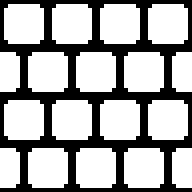

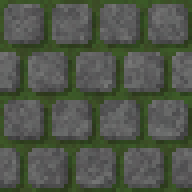

In [16]:
SIZE = 48
BRICK_SIZE = (SIZE//4, SIZE//4)
GAP_WIDTH = 2
EDGE_WIDTH = 1
SHADE_FORCE = 0.80

shape_mask = TileGen.gen_ort_mask(SIZE)
pattern_mask = TileGen.gen_brick_pattern_mask(shape_mask.size, BRICK_SIZE, GAP_WIDTH, EDGE_WIDTH).offset((-1, -1))
pattern_mask.display(SCALE)

texture_tile1 = TileGen.gen_texture_tile(shape_mask.size, 'grass').color(SHADE_FORCE)
texture_tile2 = TileGen.gen_texture_tile(shape_mask.size, 'stone.raw')

shaded_base = texture_tile1.shade(pattern_mask, (1, 1), SHADE_FORCE, False)
shaded_head = texture_tile2.shade(pattern_mask, (-1, -1), SHADE_FORCE, True)

final = shaded_base.overlay(shaded_head, pattern_mask)
final.display(SCALE)

## Plank brigde over Water

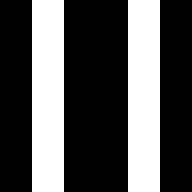

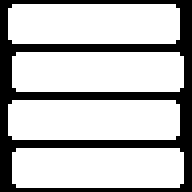

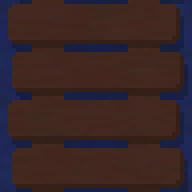

In [17]:
SIZE = (48, 48)
PLANK_SIZE = (SIZE[0]-2, SIZE[1]//4)
GAP_WIDTH = 3
EDGE_WIDTH = 1
SHADE_FORCE = 0.80

base_mask = TileGen.gen_ort_mask(SIZE)
head_mask1 = TileGen.gen_line_draw_mask(SIZE, [((SIZE[0]//4-0.5, 0), (SIZE[0]//4-0.5, SIZE[1]), 8)])
head_mask1 = TileOps.merge_masks(head_mask1, head_mask1.mirror('|'))
head_mask2 = TileGen.gen_brick_pattern_mask(SIZE, PLANK_SIZE, GAP_WIDTH, EDGE_WIDTH, row_offset=1).offset((0, -1))
head_mask1_2 = TileOps.merge_masks(head_mask1, head_mask2)

head_mask1.display(SCALE)
head_mask2.display(SCALE)

texture_tile1 = TileGen.gen_texture_tile(SIZE, 'water').color(0.75)
texture_tile2 = TileGen.gen_texture_tile(SIZE, 'wood')

base_tile =  texture_tile1.shade(head_mask1_2, (1, 2), SHADE_FORCE, False)
head_tile1 = texture_tile2.shade(head_mask2, (-1, -1), SHADE_FORCE, True)
head_tile2 = texture_tile2.rotate(90).shade(head_mask2, (-1, -1), SHADE_FORCE, True)

TileOps.merge_tiles(
    (base_tile, base_mask),
    (head_tile1, head_mask1),
    (head_tile2, head_mask2),
).display(SCALE)

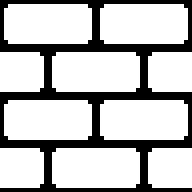

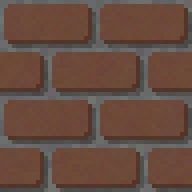

In [18]:
SIZE = 48
BRICK_SIZE = (SIZE//2, SIZE//4)
GAP_WIDTH = 2
EDGE_WIDTH = 1
SHADE_FORCE = 0.75

shape_mask = TileGen.gen_ort_mask(SIZE)
pattern_mask = TileGen.gen_brick_pattern_mask(shape_mask.size, BRICK_SIZE, GAP_WIDTH, EDGE_WIDTH).offset((-1, -1))
pattern_mask.display(SCALE)

texture_tile1 = TileGen.gen_texture_tile(shape_mask.size, 'stone').contrast(2)
texture_tile2 = TileGen.gen_texture_tile(shape_mask.size, 'clay').color(0.9)

shaded_base = texture_tile1.shade(pattern_mask, (1, 1), SHADE_FORCE, False)
shaded_head = texture_tile2.shade(pattern_mask, (-1, -1), SHADE_FORCE, True)

combined = shaded_base.overlay(shaded_head, pattern_mask)
combined.display(SCALE)

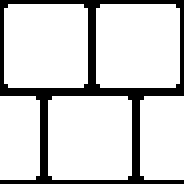

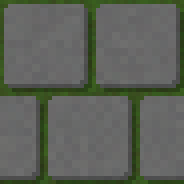

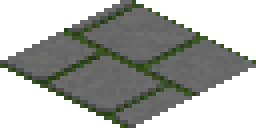

final.size=(64, 32)


In [ ]:
SIZE = (46, 46)
BRICK_SIZE = (23, 23)
PAD = 4
GAP_WIDTH = 2
EDGE_WIDTH = 1
SHADE_FORCE = 0.75

pattern_mask = TileGen.gen_brick_pattern_mask(SIZE, BRICK_SIZE, GAP_WIDTH, EDGE_WIDTH).offset((-1, -1))
pattern_mask.display(SCALE)

texture1 = TileGen.gen_texture_tile(SIZE, 'grass')
texture2 = TileGen.gen_texture_tile(SIZE, 'stone')

shaded_base = texture1.shade(pattern_mask, (1, 1), SHADE_FORCE, False)
shaded_head = texture2.shade(pattern_mask, (-1, -1), SHADE_FORCE, True)

combined = shaded_base.overlay(shaded_head, pattern_mask)
combined.display(SCALE)

final = TileOps.convert_ort2iso(combined, PAD)
final.display(SCALE)

print(f"{final.size=}")

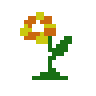

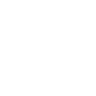

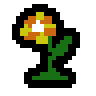

In [20]:
tile = Tile("tests/samples/addborder.png")
tile.display(SCALE)
tile.outline(1, "white", combine=False).display(SCALE)
tile.outline(2, "black", combine=True).display(SCALE)

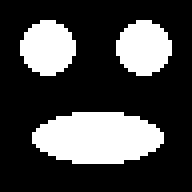

In [21]:
TileGen.gen_blobs_mask(
    (48, 48), [
        ((12, 12), 6.5),     # left eye
        ((36, 12), 6.5),     # right eye
        ((24, 34), (32, 12)) # mouth
    ]
).display(SCALE)

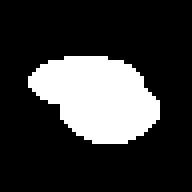

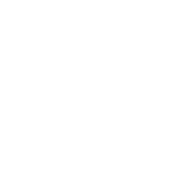

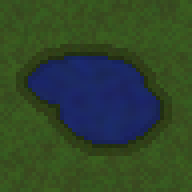

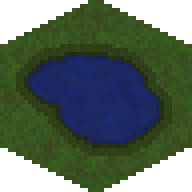

In [29]:
SIZE = (48, 48)
SHADE_FORCE = 0.9

base_mask = TileGen.gen_ort_mask(SIZE)
lakemask = TileGen.gen_blobs_mask(SIZE, [
    ((21, 20), (28, 12)), ((27, 27), (24, 16)),
])
lakemask.display(SCALE)

edgemask1 = lakemask.cutout(lakemask).outline(3, color="white", combine=False)
edgemask2 = lakemask.cutout(lakemask).outline(1, color="white", combine=False)
edgemask1.display(SCALE)

texture1 = TileGen.gen_texture_tile(lakemask.size, "grass")
texture2 = TileGen.gen_texture_tile(lakemask.size, "water")
texture3 = TileGen.gen_texture_tile(lakemask.size, "grass.wet")#.brightness(SHADE_FORCE)

texture2 = texture2.shade(lakemask, (1, 1), SHADE_FORCE, inverted=True)
texture2 = texture2.shade(lakemask, (-1, -1), SHADE_FORCE, inverted=True)

#texture1.display(SCALE)
#texture2.display(SCALE)
#texture3.display(SCALE)

final = TileOps.merge_tiles(
    (texture1, base_mask),
    (texture2, lakemask),
    (texture3, edgemask1),
    (texture3.brightness(0.75), edgemask2),
)
final.display(SCALE)

final.cutout(TileGen.gen_hex_mask(SIZE, 'point')).display(SCALE)

hex_mask.size=(36, 32)


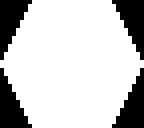

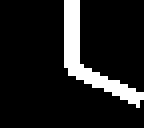

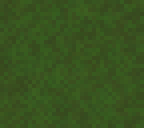

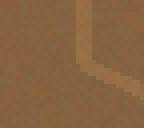

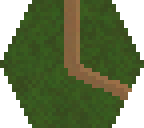

In [23]:
SIZE = 36
SHADE_FORCE = 0.9

hex_mask = TileGen.gen_hex_mask(SIZE, 'flat')
print(f"{hex_mask.size=}")
hex_mask.display(SCALE)

pathmask = TileGen.gen_line_draw_mask(hex_mask.size,
    [
        ((36/2-1, 0), (36/2-1, 32/2), 4),
        ((36/2-1, 32/2), (34, 24), 4),
    ]
)
pathmask.display(SCALE)

texture1 = TileGen.gen_texture_tile(hex_mask.size, "grass")
texture2 = TileGen.gen_texture_tile(hex_mask.size, "dirt")
texture2 = texture2.shade(pathmask, (3, -1), SHADE_FORCE, True, False)

texture1.display(SCALE)
texture2.display(SCALE)

final = (texture1
    .overlay(texture2, pathmask)
    .cutout(hex_mask)
)
final.display(SCALE)